Observed Trends

1: Only Capomulin reduced tumor volume over the course of the study

2: All Drugs saw an increase in Metastatic Sites but Capomulin was increasing at the slowest rate.

3: Survival Rate over Time decreases for all treatments but it is significantly higher for Capomulin.

In [2]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#import csv data 

trial_dat = pd.read_csv("clinicaltrial_data.csv")
drug_dat = pd.read_csv("mouse_drug_data.csv")
trial_dat.head()
#drug_dat.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#merger data on mouse ID
#school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
drug_data_complete = pd.merge(trial_dat, drug_dat, how="left", on="Mouse ID")
drug_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [5]:
#filter data for four treatments we want to look at 

treatment_data = drug_data_complete[drug_data_complete["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"])]
treatment_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [6]:
#international_duration = pd.DataFrame(grouped_international_data["duration (seconds)"].sum())

# test_data = treatment_data.iloc[:,[1,2,4]]

# test_data.set_index("Timepoint", inplace=True)
# test_data.head()
#tumor_volume = pd.DataFrame(test_data["Tumor Volume (mm3)"].mean())

capomulin_data = treatment_data.loc[treatment_data["Drug"] == "Capomulin"]
capomulin_vol_mean = capomulin_data.groupby('Timepoint', as_index=False)["Tumor Volume (mm3)"].mean()
#rename columns
capomulin_vol_mean = capomulin_vol_mean.rename(columns={"Timepoint":"Timepoint", "Tumor Volume (mm3)":"Capomulin"})

infubinol_data = treatment_data.loc[treatment_data["Drug"] == "Infubinol"]
infubinol_vol_mean = infubinol_data.groupby('Timepoint', as_index=False)["Tumor Volume (mm3)"].mean()
infubinol_vol_mean = infubinol_vol_mean.rename(columns={"Timepoint":"Timepoint", "Tumor Volume (mm3)":"Infubinol"})

ketapril_data = treatment_data.loc[treatment_data["Drug"] == "Ketapril"]
ketapril_vol_mean = ketapril_data.groupby('Timepoint', as_index=False)["Tumor Volume (mm3)"].mean()
ketapril_vol_mean = ketapril_vol_mean.rename(columns={"Timepoint":"Timepoint", "Tumor Volume (mm3)":"Ketapril"})

placebo_data = treatment_data.loc[treatment_data["Drug"] == "Placebo"]
placebo_vol_mean = placebo_data.groupby('Timepoint', as_index=False)["Tumor Volume (mm3)"].mean()
placebo_vol_mean = placebo_vol_mean.rename(columns={"Timepoint":"Timepoint", "Tumor Volume (mm3)":"Placebo"})


In [7]:
#assemble df with all drugs

tumor_volume_complete = pd.merge(capomulin_vol_mean, infubinol_vol_mean, how="left", on="Timepoint")
tumor_volume_complete = pd.merge(tumor_volume_complete, ketapril_vol_mean, how="left", on="Timepoint")
tumor_volume_complete = pd.merge(tumor_volume_complete, placebo_vol_mean, how="left", on="Timepoint")

tumor_volume_complete.head()


,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


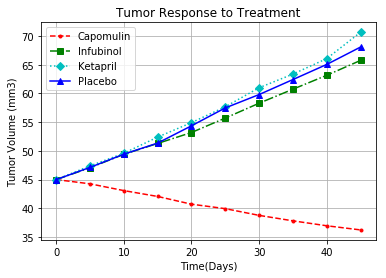

In [8]:
#plot tumor respone to treatment

#plt.scatter(tumor_volume_complete["Timepoint"], tumor_volume_complete["Capomulin"], '-o')
Capomulin, = plt.plot(tumor_volume_complete["Timepoint"], tumor_volume_complete["Capomulin"], '.r--', label="Capomulin")
Infubinol, = plt.plot(tumor_volume_complete["Timepoint"], tumor_volume_complete["Infubinol"], 'sg-.')
Ketapril, = plt.plot(tumor_volume_complete["Timepoint"], tumor_volume_complete["Ketapril"], 'Dc:')
Placebo, = plt.plot(tumor_volume_complete["Timepoint"], tumor_volume_complete["Placebo"], '^b-')

plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="best")
plt.title("Tumor Response to Treatment")
plt.grid(True)
plt.show()



In [82]:
# get data and plot for metastatic spreads

capomulin_data = treatment_data.loc[treatment_data["Drug"] == "Capomulin"]
capomulin_spread_mean = capomulin_data.groupby('Timepoint', as_index=False)["Metastatic Sites"].mean()
#rename columns
capomulin_spread_mean = capomulin_spread_mean.rename(columns={"Timepoint":"Timepoint", "Metastatic Sites":"Capomulin"})

infubinol_data = treatment_data.loc[treatment_data["Drug"] == "Infubinol"]
infubinol_spread_mean = infubinol_data.groupby('Timepoint', as_index=False)["Metastatic Sites"].mean()
infubinol_spread_mean = infubinol_spread_mean.rename(columns={"Timepoint":"Timepoint", "Metastatic Sites":"Infubinol"})

ketapril_data = treatment_data.loc[treatment_data["Drug"] == "Ketapril"]
ketapril_spread_mean = ketapril_data.groupby('Timepoint', as_index=False)["Metastatic Sites"].mean()
ketapril_spread_mean = ketapril_spread_mean.rename(columns={"Timepoint":"Timepoint", "Metastatic Sites":"Ketapril"})

placebo_data = treatment_data.loc[treatment_data["Drug"] == "Placebo"]
placebo_spread_mean = placebo_data.groupby('Timepoint', as_index=False)["Metastatic Sites"].mean()
placebo_spread_mean = placebo_spread_mean.rename(columns={"Timepoint":"Timepoint", "Metastatic Sites":"Placebo"})

In [83]:
tumor_spread_complete = pd.merge(capomulin_spread_mean, infubinol_spread_mean, how="left", on="Timepoint")
tumor_spread_complete = pd.merge(tumor_spread_complete, ketapril_spread_mean, how="left", on="Timepoint")
tumor_spread_complete = pd.merge(tumor_spread_complete, placebo_spread_mean, how="left", on="Timepoint")

tumor_spread_complete.head()

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


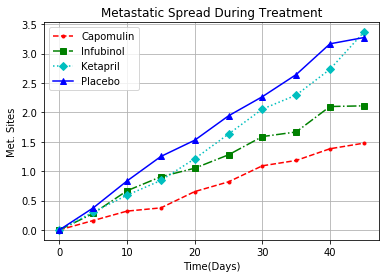

In [84]:
#plot data
Capomulin, = plt.plot(tumor_spread_complete["Timepoint"], tumor_spread_complete["Capomulin"], '.r--', label="Capomulin")
Infubinol, = plt.plot(tumor_spread_complete["Timepoint"], tumor_spread_complete["Infubinol"], 'sg-.')
Ketapril, = plt.plot(tumor_spread_complete["Timepoint"], tumor_spread_complete["Ketapril"], 'Dc:')
Placebo, = plt.plot(tumor_spread_complete["Timepoint"], tumor_spread_complete["Placebo"], '^b-')

plt.xlabel('Time(Days)')
plt.ylabel('Met. Sites')
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="best")
plt.title("Metastatic Spread During Treatment")
plt.grid(True)
plt.show()

In [90]:
#get survival rates

capomulin_data = treatment_data.loc[treatment_data["Drug"] == "Capomulin"]
capomulin_survival = capomulin_data.groupby('Timepoint', as_index=False)["Mouse ID"].count()
#rename columns
capomulin_survival = capomulin_survival.rename(columns={"Timepoint":"Timepoint", "Mouse ID":"Capomulin"})

infubinol_data = treatment_data.loc[treatment_data["Drug"] == "Infubinol"]
infubinol_survival = infubinol_data.groupby('Timepoint', as_index=False)["Mouse ID"].count()
infubinol_survival = infubinol_survival.rename(columns={"Timepoint":"Timepoint", "Mouse ID":"Infubinol"})

ketapril_data = treatment_data.loc[treatment_data["Drug"] == "Ketapril"]
ketapril_survival = ketapril_data.groupby('Timepoint', as_index=False)["Mouse ID"].count()
ketapril_survival = ketapril_survival.rename(columns={"Timepoint":"Timepoint", "Mouse ID":"Ketapril"})

placebo_data = treatment_data.loc[treatment_data["Drug"] == "Placebo"]
placebo_survival = placebo_data.groupby('Timepoint', as_index=False)["Mouse ID"].count()
placebo_survival = placebo_survival.rename(columns={"Timepoint":"Timepoint", "Mouse ID":"Placebo"})

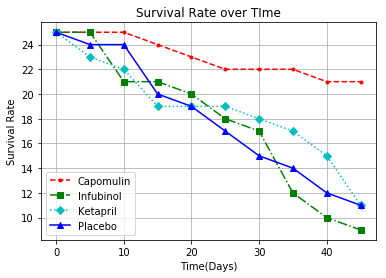

In [94]:
tumor_survival = pd.merge(capomulin_survival, infubinol_survival, how="left", on="Timepoint")
tumor_survival = pd.merge(tumor_survival, ketapril_survival, how="left", on="Timepoint")
tumor_survival = pd.merge(tumor_survival, placebo_survival, how="left", on="Timepoint")

tumor_survival.head()

#plot data
Capomulin, = plt.plot(tumor_survival["Timepoint"], tumor_survival["Capomulin"], '.r--', label="Capomulin")
Infubinol, = plt.plot(tumor_spread_complete["Timepoint"], tumor_survival["Infubinol"], 'sg-.')
Ketapril, = plt.plot(tumor_survival["Timepoint"], tumor_survival["Ketapril"], 'Dc:')
Placebo, = plt.plot(tumor_survival["Timepoint"], tumor_survival["Placebo"], '^b-')

plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate')
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="best")
plt.title("Survival Rate over TIme")
plt.grid(True)
plt.show()